<a href="https://colab.research.google.com/github/pemk15/web-crawler/blob/Dev/SeleniumCrawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprenda a utilizar o Selenium para Web Scraping

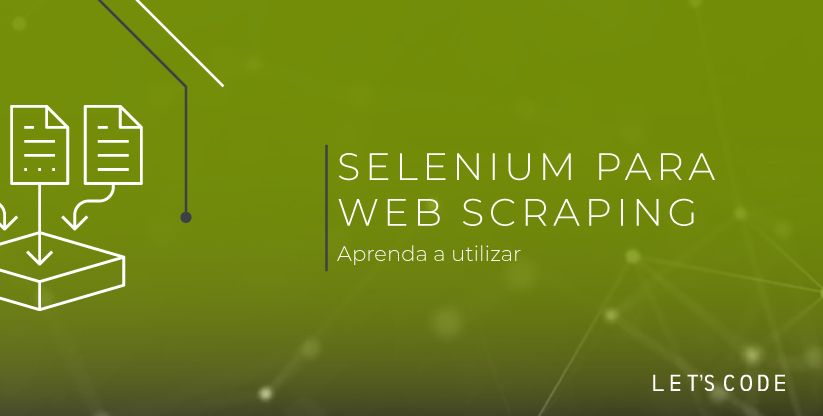

Um dos maiores atrativos de utilizar Python é a facilidade de trabalhar com dados e gerar diferentes visualizações porém, eles nem sempre estão disponíveis facilmente. Muitas vezes, os dados que precisamos estão apenas em uma página web, o que torna muito mais difícil captura-los e utiliza-los dentro do seu programa. E é aí que entra o web scraping e a ferramenta que vamos utilizar para isso, o Selenium.

## Web scraping


Quando fazemos web scraping, estamos interpretando o conteúdo de uma página web, de forma a extrair os dados brutos nos quais estamos interessados. Isso já deixa o problema mais complicado do que se tivéssemos os dados disponíveis prontamente por uma API.

Por exemplo, se estivéssemos interessados nos dados de temperatura de várias cidades, temos disponíveis as 2 formas de obtenção de dados. Temos diversas APIs feitas justamente para essa função, como a OpenWeatherMap, que retornam os dados de forma estruturada, em Json ou XML, por exemplo. Assim, com uma simples request HTTP, conseguimos obter os dados de interesse.

Poderíamos também obter esses dados a partir de uma página web, como a do Climatempo. Esses dados, no entanto, estarão misturados com várias tags HTML, que estão lá pra organização visual da página e não influencia nos dados. A utilização desses dados dessa forma é mais complicada além de nos deixar vulnerável à mudanças na organização visual da página. Com isso, corremos o risco de quebrar completamente programas antigos que faziam web scraping da página.

Via de regra, sempre que possível, é preferível optar por APIs ou outra forma de obter os dados de forma estruturada. No entanto, nem sempre isso é possível, e esse é o motivo pelo qual as ferramentas de web scraping têm sido tão utilizadas. Um exemplo seria de uma empresa de prestação de serviços que quer compilar o preço de um dos seus competidores diariamente. Esses são dados que estão disponíveis abertamente no site do competidor, mas que não estão disponíveis em nenhuma API.

A empresa tem 2 escolhas: alocar um funcionário para entrar diariamente no site do competidor e anotar os valores manualmente (demorado e propenso a erros), ou criar um script de web scraping para o site do competidor. Apesar de ser um esforço inicial maior, o mesmo obtém esses dados diariamente de forma rápida e sem intervenção.

## Selenium
O Selenium é um webdriver, ou seja, uma ferramenta  que permite simular um usuário real utilizando um navegador. Desde a sua criação, ele é usado como uma ferramenta de testes automatizados. Ou seja, pode-se acionar uma ferramenta para rodar, capaz de simular a entrada de um usuário no site e verificar o seu funcionamento corretamente. No entanto, hoje, ele se tornou uma ferramenta geral de manipulação de sites e também é utilizado para web scraping.

## Porque usar o Selenium para web scraping


Para uma grande quantidade de sites, o uso de bibliotecas de requests HTTP e de web scraping, como a BeautifulSoup, são o suficiente. Porém, tem aumentado muito a quantidade de sites que utilizam Single Page Applications (mais informações neste vídeo). Ele pode ser construído com frameworks de javascript, como Angular, Vue e React e que precisam de um navegador para chegar no resultado que temos na nossa tela ao abrir o site.

Por exemplo, se utilizarmos a biblioteca requests do Python para obter o código de 2 sites, a definição de Python na Wikipedia e o site do framework de javascript React, são bem diferentes. O primeiro retorna o site já montado, exatamente como vemos ao abrir o site pelo navegador. Já no segundo caso, temos um site que é gerado dinamicamente e que, portanto, ainda não contém os dados que queremos obter no meio do HTML. Logo, esse é um dos motivos para utilizar o Selenium, pois precisamos aguardar que todo esse processamento seja feito pelo navegador, para depois buscarmos os dados na página:

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="pt" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Python – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )ptwi
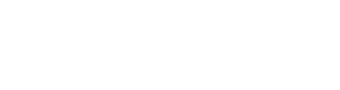

In [1]:
import requests

resposta_python = requests.get("https://pt.wikipedia.org/wiki/Python")
texto_python = resposta_python.text
print(texto_python)

resposta_react = requests.get("https://pt-br.reactjs.org")
texto_react = resposta_react.text
print(texto_react)

## Instalando o Selenium


O selenium é uma ferramenta independente de linguagem de programação, que inclusive tem uma IDE própria e conseguimos gravar comandos, além de diversas outras funcionalidades. Para este artigo, vamos utilizar o selenium a partir do Python. Para isso, precisamos instalar a biblioteca de Python do Selenium, usando:

In [2]:
pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00


## Abrindo uma página

O primeiro passo a se seguir é abrir o webdriver do selenium na página que estivermos interessados. No código abaixo, primeiro importamos a biblioteca do selenium para Python. Então, criamos uma instância de navegador usando o webdriver do Firefox (isso vai mudar de acordo com o seu navegador de preferência). Logo, usamos a função get() para abrir o site da Let’s Code, por exemplo:



In [3]:
from selenium import webdriver

navegador = webdriver.Firefox()
navegador.get('https://letscode.com.br')

SessionNotCreatedException: ignored

## Interagindo com a página


Para achar um elemento específico da página, precisamos analisar seu HTML. A forma mais fácil de fazer isso é usando as ferramentas de desenvolvedor do navegador. Essas ferramentas geralmente podem ser acessadas com o botão F12 ou clicando em algum lugar da página com o botão direito e clicar em "inspecionar elemento". Com isso, podemos ver todas a estruturas da página e também os nomes, classes e ids de cada elemento.

Como exemplo, vamos tentar obter os nomes de todos os coders disponíveis na página “Nosso Time”, partindo da página que estamos. O primeiro passo é navegar para a página que queremos chegar, podemos fazer isso diretamente com o link:

In [ ]:
navegador.get('https://letscode.com.br/nosso-time')

Já nessa página, temos que selecionar todos os cards dos coders. Ao usar "inspecionar elemento", podemos ver que todos os cards possuem a estrutura abaixo. Algumas propriedades de estilo foram ocultadas para deixar o código mais limpo, mas acessando o site diretamente, poderá visualizar tudo.


```
<div class="coderCard" tabindex="-1" style="..">
    <div>
        <div style="...">
            <img alt="Victor Chacon" src="..." decoding="async" class="coderPhoto" style="..." sizes="100vw" srcset="...">
        </div>
    </div>
    <div class="coderCardInfoContainer">
        <div class="nameHolder">
            <p>
                <b>Victor Chacon</b>
            </p>
            <p>Graduado em Engenharia Mecatrônica</p>
            <p>
                <strong>POLI-USP </strong>
            </p>
        </div>
        <div class="iconHolder">
            <img src="...">
        </div>
    </div>
    <div class="description">
        <p>Professor de Python e Banco de Dados</p>
        <p>Graduado em Engenharia Mecatrônica - POLI-USP </p>
    </div>
</div>
```



Podemos ver que todos esses cards têm uma classe em comum chamada “coderCard”, podemos usar essa informação para selecionar todos de uma vez. Para saber mais sobre as estratégias de seleção disponíveis, clique nesse site. Essa operação nos retorna uma lista, na qual podemos usar um for para iterar sobre todos os cards e selecionar o valor do nome de cada um deles, como fizemos abaixo:

In [ ]:
cards = navegador.find_elements_by_class_name('coderCard')
for card in cards:
    nameHolder = card.find_element_by_class_name('nameHolder')
    firstP = nameholder.find_element_by_tag_name('p')
    tagB = firstP.find_element_by_tag_name('b')
    nome = tagB.get_attribute('innerHTML')
    print(nome)